# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.<br>
The numbering of the algorithms, tables and page refer to the book.

## Chapter 15: Direct search method

### Algorithm 15.1: Nelder-Mead

In [1]:
import numpy as np
from scipy import linalg
# Define a function simple to call for the inner product
def scalarInner(a,b):
    return(np.asscalar(a.T.dot(b)))

In [2]:
import optimizationExceptions

def nelderMead(obj,x0,eps=1.0e-5,maxiter=100):
    n,m = x0.shape
    x = x0
    it = 0
    if m != n+1: 
        raise OptimizationInputError("Incorrect size")
    iters=list()
    while True:  
        it = it + 1
        f = [obj(x[:,k]) for k in range(m)]
        ## Worst value
        worst = max(f)
        worstindex = np.argmax(f)
        xworst = x[:,[worstindex]]
        ## Best value
        best = min(f)
        bestindex = np.argmin(f) 
        tmp = f
        tmp[worstindex] = -np.inf
        secondworst = max(tmp)
        secondworstindex = np.argmax(tmp)
        xc = (np.sum(x,axis=1,keepdims=True) - xworst) / n
        d = xc - x[:,[worstindex]]
        xr = 2 * xc - xworst
        fxr = obj(xr) 
        if fxr < best:
          xe = 2 * xr - xc
          fxe = obj(xe)
          if fxe < fxr:
            xnew = xe
          else:
            xnew = xr 
        elif secondworst > fxr:
            xnew = xr
        elif fxr >= worst:
            xnew = 0.5 * (xworst + xc)
        else:
            xnew = 0.5 * (xr + xc)
        fxnew = obj(xnew)
        iters.append([x.copy(),xworst.copy(),xnew.copy(),xr])
        x[:,[worstindex]] = xnew
        if linalg.norm(d) < eps or it >= maxiter:
            break

    return x[:,bestindex],iters


Example 15.2, page 350

In [3]:
def f(x):
    f = 0.5 * x.item(0) * x.item(0) + 4.5 * x.item(1) * x.item(1)
    return f

In [4]:
x0 = np.array([[1, 2 , 1.1],[ 1, 1.1, 2]])
x0
(sol,iters) = nelderMead(f,x0)
sol

array([-5.71073706e-06,  6.14849584e-08])

Table 15.1, page 352

In [5]:
for k in range(len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(k+1,iters[k][0][0,0],iters[k][0][0,1],iters[k][0][0,2],iters[k][3].item(0),iters[k][2].item(0)))
    print("\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(iters[k][0][1,0],iters[k][0][1,1],iters[k][0][1,2],iters[k][3].item(1),iters[k][2].item(1)))
    print("_________________________________________________________________________________________")
    print("\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(f(iters[k][0][:,0]),f(iters[k][0][:,1]),f(iters[k][0][:,2]),f(iters[k][3]),f(iters[k][2])))
    print("_________________________________________________________________________________________")
   
    

1	+1.000000E+00	+2.000000E+00	+1.100000E+00	+1.900000E+00	+1.900000E+00
	+1.000000E+00	+1.100000E+00	+2.000000E+00	+1.000000E-01	+1.000000E-01
_________________________________________________________________________________________
	+5.000000E+00	+7.445000E+00	+1.860500E+01	+1.850000E+00	+1.850000E+00
_________________________________________________________________________________________
2	+1.000000E+00	+2.000000E+00	+1.900000E+00	+9.000000E-01	+9.000000E-01
	+1.000000E+00	+1.100000E+00	+1.000000E-01	-4.440892E-16	-4.440892E-16
_________________________________________________________________________________________
	+5.000000E+00	+7.445000E+00	+1.850000E+00	+4.050000E-01	+4.050000E-01
_________________________________________________________________________________________
3	+1.000000E+00	+9.000000E-01	+1.900000E+00	+1.800000E+00	+1.200000E+00
	+1.000000E+00	-4.440892E-16	+1.000000E-01	-9.000000E-01	+5.250000E-01
_____________________________________________________________________

Figure 15.2 (a), page 350

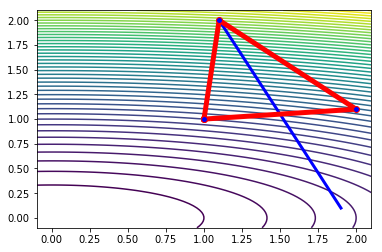

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return 0.5 * x * x + 4.5 * y * y
xmin = -0.1
xmax = 2.1
ymin = -0.1
ymax = 2.1
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
iter = 0
xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
xarrow = [iters[iter][1].item(0),iters[iter][2].item(0)]
yarrow = [iters[iter][1].item(1),iters[iter][2].item(1)]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xarrow,yarrow,linewidth=3,color='b')
plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.show()

Figure 15.2 (b), page 350

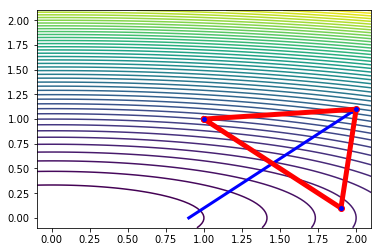

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return 0.5 * x * x + 4.5 * y * y
xmin = -0.1
xmax = 2.1
ymin = -0.1
ymax = 2.1
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
iter = 1
xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
xarrow = [iters[iter][1].item(0),iters[iter][2].item(0)]
yarrow = [iters[iter][1].item(1),iters[iter][2].item(1)]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xarrow,yarrow,linewidth=3,color='b')
plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.show()

Figure 15.2 (c), page 350

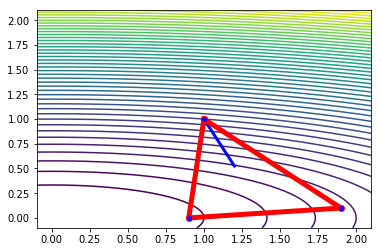

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return 0.5 * x * x + 4.5 * y * y
xmin = -0.1
xmax = 2.1
ymin = -0.1
ymax = 2.1
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
iter = 2
xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
xarrow = [iters[iter][1].item(0),iters[iter][2].item(0)]
yarrow = [iters[iter][1].item(1),iters[iter][2].item(1)]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xarrow,yarrow,linewidth=3,color='b')
plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.show()

Figure 15.2 (d), page 350

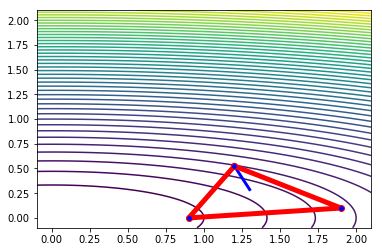

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return 0.5 * x * x + 4.5 * y * y
xmin = -0.1
xmax = 2.1
ymin = -0.1
ymax = 2.1
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
iter = 3
xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
xarrow = [iters[iter][1].item(0),iters[iter][2].item(0)]
yarrow = [iters[iter][1].item(1),iters[iter][2].item(1)]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xarrow,yarrow,linewidth=3,color='b')
plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.show()

Figure 15.3 (a), page 351

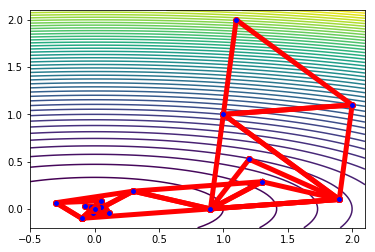

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return 0.5 * x * x + 4.5 * y * y
xmin = -0.5
xmax = 2.1
ymin = -0.2
ymax = 2.1
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
for iter in range(len(iters)):
    xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
    yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
    plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()

Figure 15.3 (b), page 351

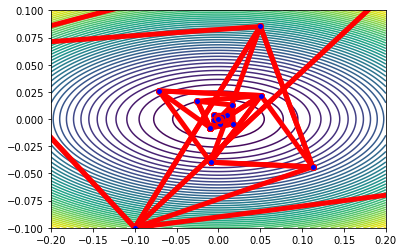

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return 0.5 * x * x + 4.5 * y * y
xmin = -0.2
xmax = 0.2
ymin = -0.1
ymax = 0.1
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
for iter in range(len(iters)):
    xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
    yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
    plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()

Example 15.3, page 352

In [12]:
def mckinnon(x):
    x1 = x.item(0)
    x2 = x.item(1)
    return (x1 <= 0) * (360 * x1 * x1 + x2 + x2 * x2) + (x1 > 0) * (6 * x1 * x1 + x2 + x2 * x2)

In [13]:
x0 = np.array([[1, (1+np.sqrt(33))/8 , 0],[ 1, (1-np.sqrt(33))/8, 0]])
x0
(sol,iters) = nelderMead(mckinnon,x0)
sol

array([0., 0.])

Figure 15.4, page 353

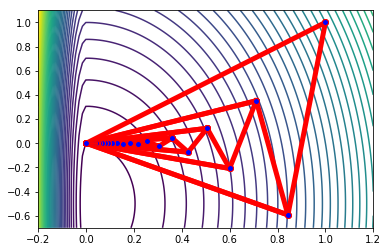

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    res = (x <= 0) * (360 * x * x + y + y * y) + (x > 0) * (6 * x * x + y + y * y)
    return res
xmin = -0.2
xmax = 1.2
ymin = -0.7
ymax = 1.1
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
for iter in range(len(iters)):
    xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
    yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
    plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()

Figure 15.5 (a), page 354

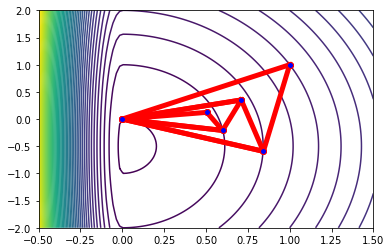

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    res = (x <= 0) * (360 * x * x + y + y * y) + (x > 0) * (6 * x * x + y + y * y)
    return res
xmin = -0.5
xmax = 1.5
ymin = -2
ymax = 2
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
for iter in range(4):
    xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
    yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
    plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()

Figure 15.5 (b), page 354

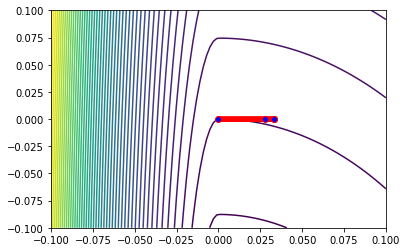

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    res = (x <= 0) * (360 * x * x + y + y * y) + (x > 0) * (6 * x * x + y + y * y)
    return res
xmin = -0.1
xmax = 0.1
ymin = -0.1
ymax = 0.1
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
for iter in range(20,21):
    xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
    yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
    plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()

In [17]:
for k in range(len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(k+1,iters[k][0][0,0],iters[k][0][0,1],iters[k][0][0,2],iters[k][3].item(0),iters[k][2].item(0)))
    print("\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(iters[k][0][1,0],iters[k][0][1,1],iters[k][0][1,2],iters[k][3].item(1),iters[k][2].item(1)))
    print("_________________________________________________________________________________________")
    print("\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(f(iters[k][0][:,0]),f(iters[k][0][:,1]),f(iters[k][0][:,2]),f(iters[k][3]),f(iters[k][2])))
    print("_________________________________________________________________________________________")
   
    

1	+1.000000E+00	+8.430703E-01	+0.000000E+00	-1.569297E-01	+7.107676E-01
	+1.000000E+00	-5.930703E-01	+0.000000E+00	-1.593070E+00	+3.517324E-01
_________________________________________________________________________________________
	+5.000000E+00	+1.938180E+00	+0.000000E+00	+1.143274E+01	+8.093159E-01
_________________________________________________________________________________________
2	+7.107676E-01	+8.430703E-01	+0.000000E+00	-1.323027E-01	+5.992271E-01
	+3.517324E-01	-5.930703E-01	+0.000000E+00	+9.448027E-01	-2.086021E-01
_________________________________________________________________________________________
	+8.093159E-01	+1.938180E+00	+0.000000E+00	+4.025687E+00	+3.753532E-01
_________________________________________________________________________________________
3	+7.107676E-01	+5.992271E-01	+0.000000E+00	-1.115405E-01	+5.051906E-01
	+3.517324E-01	-2.086021E-01	+0.000000E+00	-5.603345E-01	+1.237157E-01
_____________________________________________________________________

### Algorithm 15.2: Torczon's multi-directional method

In [18]:
def torczon(obj,x0,eps=1.0e-5,maxiter=100):
    x = x0
    n,m = x0.shape
    x = x0
    it = 0
    if m != n+1: 
        raise OptimizationInputError("Incorrect size")
    iters=list()
    while True:  
        it = it + 1
        f = [obj(x[:,k]) for k in range(m)]
        ## Worst value
        worst = max(f)
        worstindex = np.argmax(f)
        xworst = x[:,[worstindex]]
        ## Best value
        best = min(f)
        bestindex = np.argmin(f) 
        xbest = x[:,[bestindex]]
        d = xworst - xbest 
  
        iterOutput = [x.copy(),xbest.copy(),best]
        ## Reflexion
        xr = np.empty(x.shape)
        for k in range(m):
            if k != bestindex:
                xr[:,[k]] = 2 * xbest - x[:,[k]]
            else:
                xr[:,[k]] = xbest                
        fr = [obj(xr[:,k]) for k in range(m)]
        
        ## Best value
        bestr = min(fr)
        bestrindex = np.argmin(fr) 

        if  bestr >= best:
            ## Contraction
            for k in range(m):
                if k != bestindex:
                    x[:,[k]] = 0.5 * (xbest + x[:,[k]])
            status = "C"
        else:

            ## Expansion
            xe = np.empty(x.shape)
            for k in range(m):
                if k == bestindex:
                    xe[:,[k]] = xbest
                else:
                    xe[:,[k]] = 3 * xbest - 2 * x[:,[k]]
            fe = [obj(xe[:,k]) for k in range(m)]
            ## Best value
            beste = min(fe)
            besteindex = np.argmin(fe) 
    
            if beste >= bestr:
                x = xr
                status = "R"
            else:
                x = xe
                status = "E"
        iters.append(iterOutput + [status])
        if linalg.norm(d) < eps or it >= maxiter:
            break
    return x[:,[bestindex]],iters


In [19]:
x0 = np.array([[1, (1+np.sqrt(33))/8 , 0],[ 1, (1-np.sqrt(33))/8, 0]])
print(x0)
(sol,iters) = torczon(mckinnon,x0)
sol

[[ 1.          0.84307033  0.        ]
 [ 1.         -0.59307033  0.        ]]


array([[ 5.12295925e-06],
       [-5.00001308e-01]])

In [20]:
print("(x1)1\t\t(x1)2\t\tf(x1)\t\tStatus")
for k in range(len(iters)):
    print("{:+E}\t{:+E}\t{:+E}\t{}".format(iters[k][1].item(0),iters[k][1].item(1),iters[k][2],iters[k][3]))
     

(x1)1		(x1)2		f(x1)		Status
+0.000000E+00	+0.000000E+00	+0.000000E+00	C
+0.000000E+00	+0.000000E+00	+0.000000E+00	C
+0.000000E+00	+0.000000E+00	+0.000000E+00	C
+1.053838E-01	-7.413379E-02	-2.003511E-03	E
+6.615137E-02	-4.724014E-01	-2.229823E-01	C
+6.615137E-02	-4.724014E-01	-2.229823E-01	C
+6.615137E-02	-4.724014E-01	-2.229823E-01	R
+3.651374E-03	-5.349014E-01	-2.487019E-01	C
+3.651374E-03	-5.349014E-01	-2.487019E-01	C
+3.651374E-03	-5.349014E-01	-2.487019E-01	C
+3.651374E-03	-5.349014E-01	-2.487019E-01	C
+3.651374E-03	-5.349014E-01	-2.487019E-01	R
+3.581306E-04	-5.325847E-01	-2.489375E-01	E
+1.584144E-03	-5.201388E-01	-2.495794E-01	R
+2.810157E-03	-5.076930E-01	-2.498934E-01	C
+2.810157E-03	-5.076930E-01	-2.498934E-01	R
+3.423163E-03	-5.014700E-01	-2.499275E-01	C
+1.470038E-03	-5.034232E-01	-2.499753E-01	R
-1.765836E-04	-5.022648E-01	-2.499836E-01	R
+1.299197E-04	-4.991534E-01	-2.499992E-01	C
-2.333193E-05	-5.007091E-01	-2.499993E-01	C
+5.329388E-05	-4.999312E-01	-2.500000E-01	C
+5.3

Figure 15.7, page 357

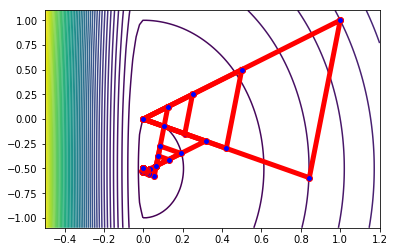

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    res = (x <= 0) * (360 * x * x + y + y * y) + (x > 0) * (6 * x * x + y + y * y)
    return res
xmin = -0.5
xmax = 1.2
ymin = -1.1
ymax = 1.1
xlist = np.linspace(xmin,xmax,100)
ylist = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,50)
for iter in range(len(iters)):
    xiter = [iters[iter][0][:,k].item(0) for k in range(3)]+[iters[iter][0][:,0].item(0)]
    yiter = [iters[iter][0][:,k].item(1) for k in range(3)]+[iters[iter][0][:,0].item(1)]
    plt.plot(xiter,yiter, linewidth=5, color='r',marker='o',mfc='blue')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()